In [1]:
! pip install optax

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 140 kB 5.0 MB/s 
     |████████████████████████████████| 72 kB 590 kB/s 


In [2]:
! git init .
! git remote add origin https://github.com/VLSF/SNO
! git pull origin main

Initialized empty Git repository in /content/.git/
remote: Enumerating objects: 74, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 74 (delta 27), reused 66 (delta 22), pack-reused 0
Unpacking objects: 100% (74/74), done.
From https://github.com/VLSF/SNO
 * branch            main       -> FETCH_HEAD
 * [new branch]      main       -> origin/main


In [3]:
import matplotlib.pyplot as plt
from functions import Chebyshev, Fourier, utils
import jax.numpy as jnp
from jax import random

%config InlineBackend.figure_format='retina'

I am going to explain how to work with [datasets](https://drive.google.com/drive/folders/1x5-rPf5Rg-KYy7tB9ibxsnFosRMmjIrb?usp=sharing).

Datasets are for two equations, Burgers and Elliptic. They are contained in three folders:

+ Elliptic
+ Burgers_1D
+ Burgers_2D

Below I am going to describe content of each folder.

# Elliptic

There are two files: `Elliptic_U.npz` and `Elliptic_Ch.npz`.

Both of them contain diffusion coefficient (features) $k(x)$ for the equation $\Delta \left(k(x)\nabla u(x)\right) = 1$ with Dirichlet boundary conditions and the solution (targets) $u(x)$.

The difference is `Elliptic_U.npz` store values on the uniform grid whereas `Elliptic_Ch.npz` store Chebyshev coefficients.

Below is an example of how to read the data.

## Samples on uniform grid

In [9]:
path = "path_to_Elliptic_U.npz"
data = jnp.load("path_to_Elliptic_U.npz")

In [10]:
print(data["features"].shape) # diffusion coefficient k(x), shape = (sample, x, y)
print(data["targets"].shape) # solution u(x), shape = (sample, x, y)

(2000, 100, 100)
(2000, 100, 100)


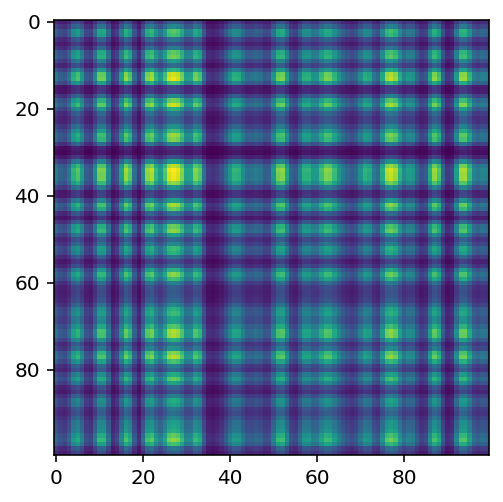

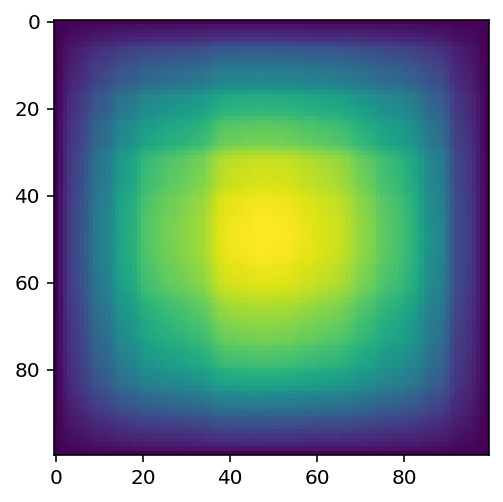

In [12]:
# diffusion coefficient was constructed as dirrect product of functions
plt.imshow(data["features"][0])
plt.figure()
plt.imshow(data["targets"][0]);

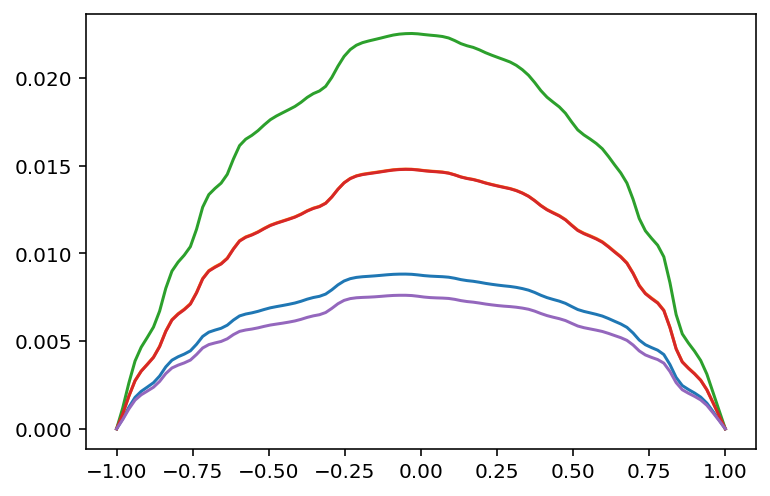

In [15]:
# lets look at a few x-slices, i.e. we plot u(x_i, y) as a function of y
x = jnp.linspace(-1, 1, 100)

for i in [10, 20, 50, 80, 90]:
  plt.plot(x, data["targets"][0, i, :])

## Chebyshev coefficients

In [16]:
path = "path_to_Elliptic_Ch.npz"
data = jnp.load(path)

In [17]:
print(data["features"].shape) # diffusion coefficient k(x), shape = (sample, x, y)
print(data["targets"].shape) # solution u(x), shape = (sample, x, y)

(2000, 100, 100)
(2000, 100, 100)


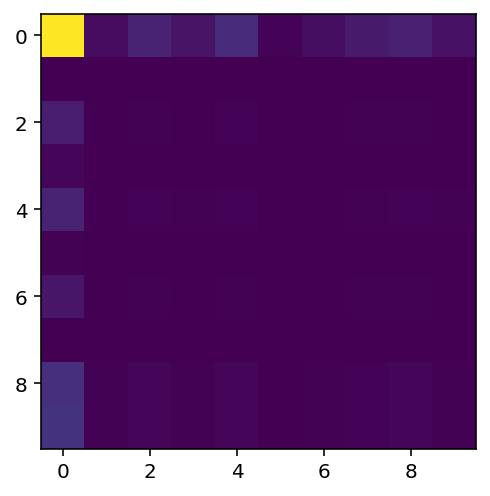

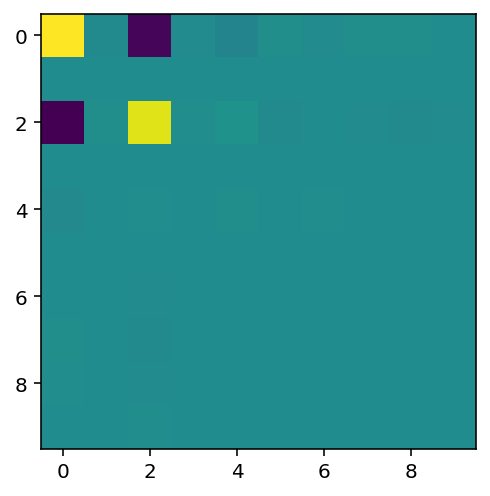

In [20]:
# if we are going to look at the pictures are above, the result is not going to be impressive
# this is because Chebyshev polynomials compress smooth functions efficiently

plt.imshow(abs(data["features"][0])[:10, :10])
plt.figure()
plt.imshow(data["targets"][0][:10, :10]);

We can check that the result makes sense, computing values of the function.

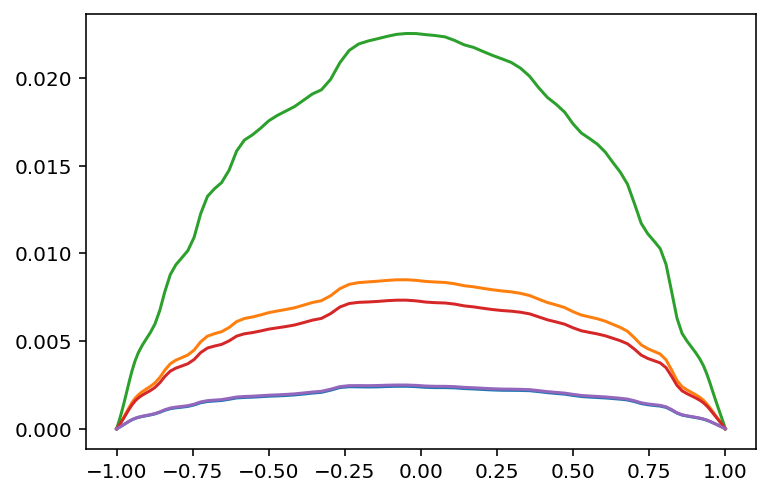

In [23]:
x = utils.grid(100)
d_ = Chebyshev.coefficients_to_values(data["targets"][0, :, :].reshape((100, 100, 1))).reshape((100, 100))

for i in [10, 20, 50, 80, 90]:
  data
  plt.plot(x, d_[i, :])

Тote that this is not the same picture as above. This is because we computed $u(x_i, y)$ at different places, i.e., on Chebyshev grid in place of the uniform one.

# Burgers 1D

This dataset is for autoregression setting, i.e., features are initial coniditons $u(x, 0)$ and targets are solutions of Burgers equation $u(x, 1)$.


There are two types of files `*_high.npz` and `*_low.npz`. The former one refers to smooth regime with $\nu=0.1$, and the later one refers to low-smoothness regime with $\nu=0.01$. Besides that there is a part of the name which describes basis functions:

+ `Ch` -- Chebyshev basis,
+ `U` -- uniform grid,
+ `F` -- Fourier basis.

Lets look at the data.

In [24]:
path = "path_to_Burgers_U_high.npz"
data = jnp.load(path)

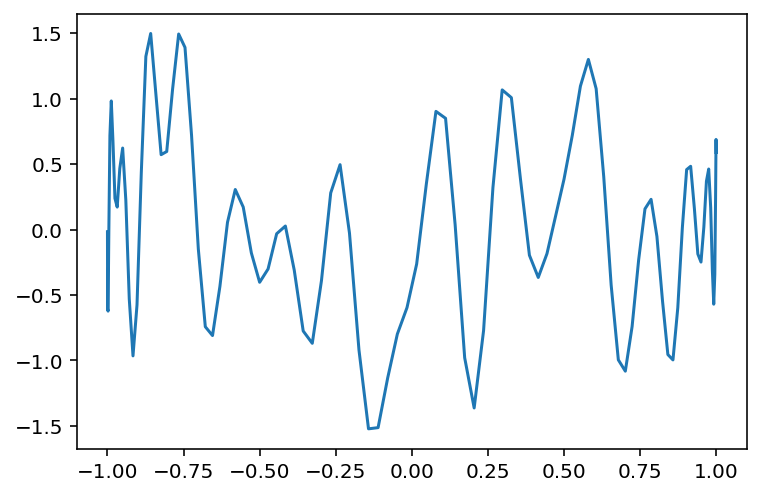

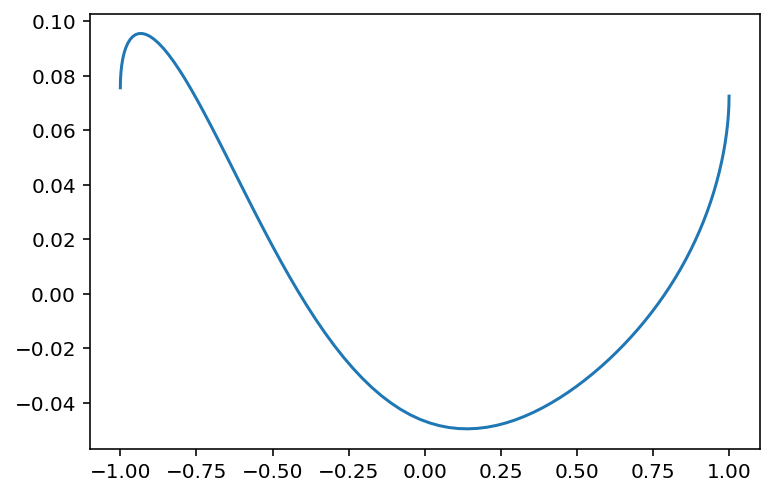

In [25]:
x = utils.grid(100, periodic=False)

plt.plot(x, data["features"][0])
plt.figure()
plt.plot(x, data["targets"][0]);

In [26]:
path = "path_to_Burgers_Ch_high.npz"
data = jnp.load(path)

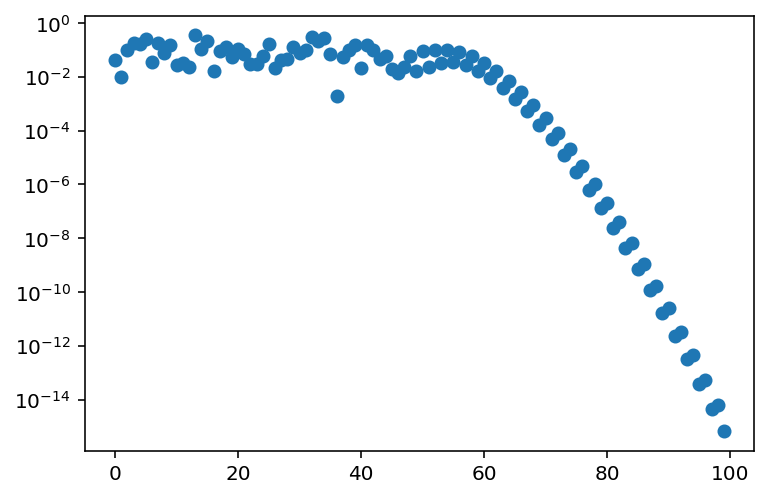

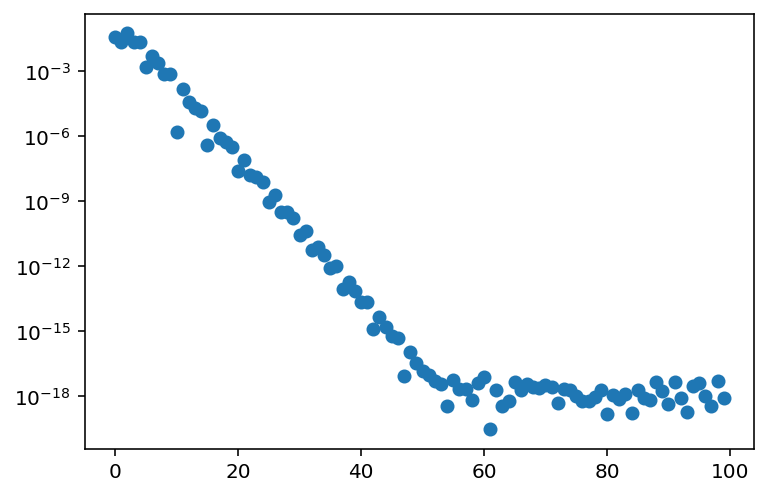

In [29]:
plt.yscale("log")
plt.plot(abs(data["features"][0]), "o")
plt.figure()
plt.yscale("log")
plt.plot(abs(data["targets"][0]), "o");

In [30]:
path = "path_to_Burgers_F_low.npz"
data = jnp.load(path)

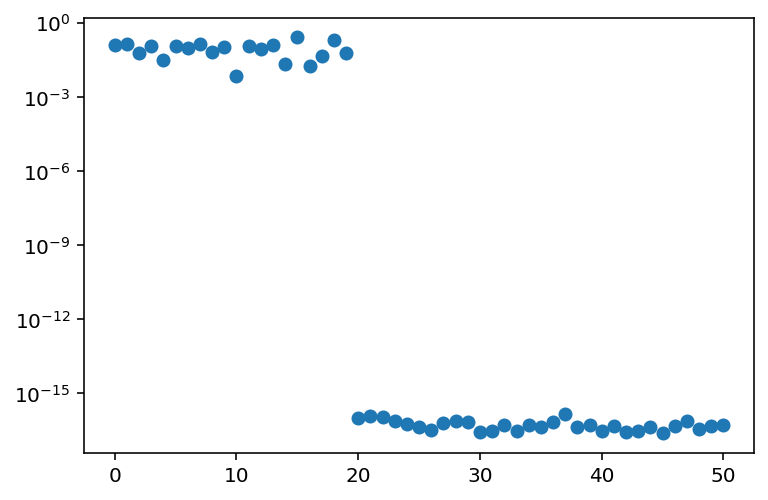

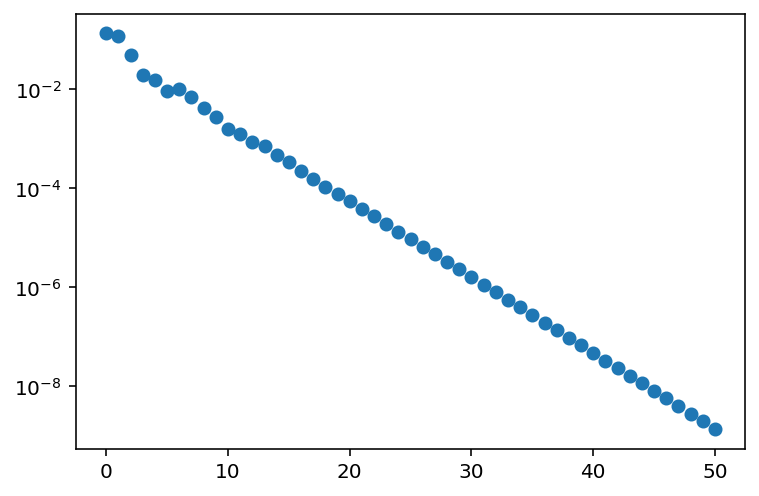

In [31]:
plt.yscale("log")
plt.plot(abs(data["features"][0]), "o")
plt.figure()
plt.yscale("log")
plt.plot(abs(data["targets"][0]), "o");

# Burgers 2D

For 2D the name convention is the same.

In [32]:
path = "path_to_Burgers_low_U.npz"
data = jnp.load(path)

In [33]:
print(data["features"].shape) 
print(data["targets"].shape)

(2000, 100, 100)
(2000, 100, 100)


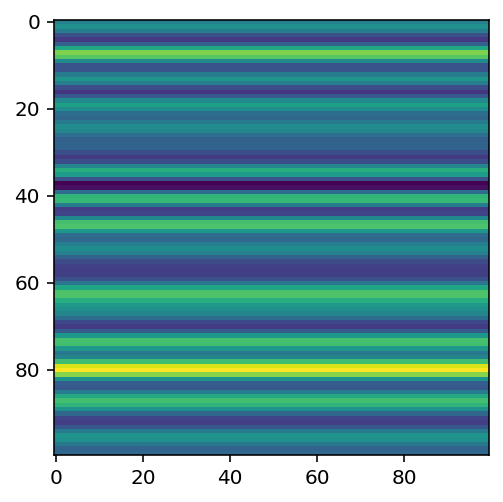

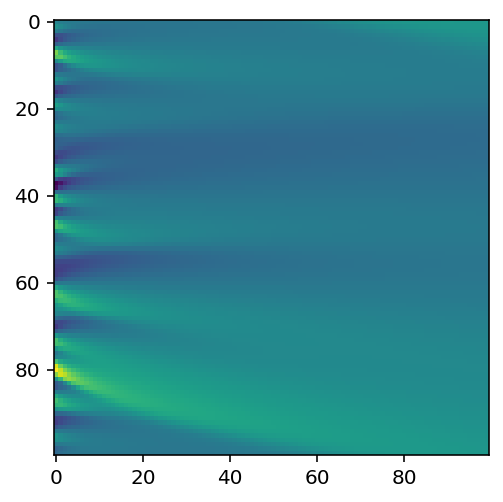

In [34]:
plt.imshow(data["features"][0]) # initial condition are stored as u(x, t) = u(x, 0)
plt.figure()
plt.imshow(data["targets"][0]); # target is a solution to Burgers equation stored as u(x, t)

`Ch` files contains coefficients of Chebyshev series for each dimension.

In [55]:
path = "path_to_Burgers_low_Ch.npz"
data = jnp.load(path)

For Chebyshev features contains only initial conditions.

In [56]:
print(data["features"].shape) 
print(data["targets"].shape)

(2000, 100)
(2000, 100, 100)


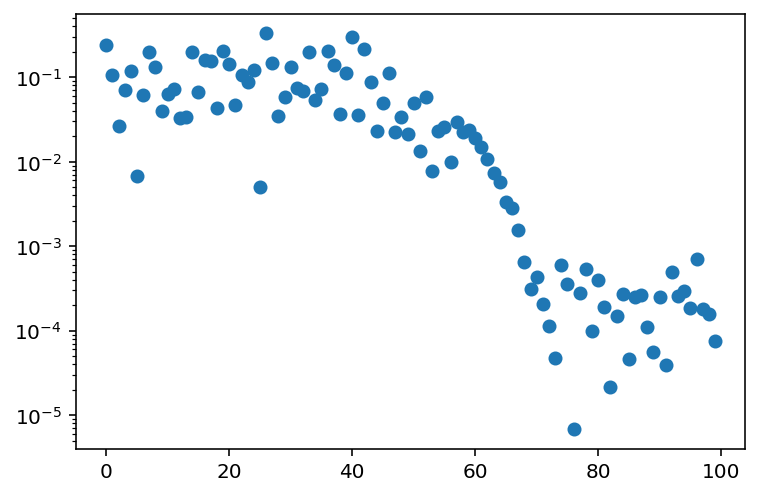

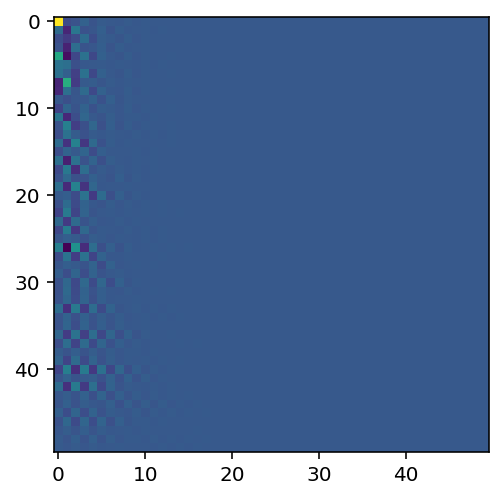

In [58]:
plt.yscale("log")
plt.plot(abs(data["features"][3]), "o");
plt.figure()
plt.imshow(data["targets"][3][:50, :50]);

We can switch back to values on Chebyshev grid and reinterpolate on the uniform grid.

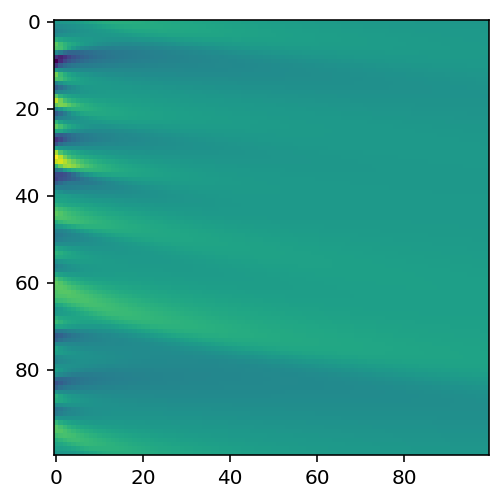

In [60]:
x = jnp.linspace(-1, 1, 100)
W = utils.get_interpolation_matrix(x, 100)

d_ = Chebyshev.coefficients_to_values(data["targets"][3, :, :].reshape((100, 100, 1))).reshape((100, 100))

d_ = (W @ d_) / (W @ jnp.ones_like(d_))
d_ = (d_ @ W.T) / (jnp.ones_like(d_) @ W.T)

plt.figure()
plt.imshow(d_);

In [61]:
path = "path_to_Burgers_high_Ch.npz"
data = jnp.load(path)

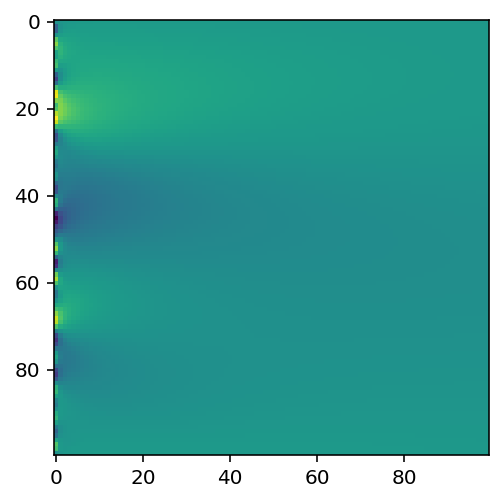

In [63]:
x = jnp.linspace(-1, 1, 100)
W = utils.get_interpolation_matrix(x, 100)

d_ = Chebyshev.coefficients_to_values(data["targets"][0, :, :].reshape((100, 100, 1))).reshape((100, 100))

d_ = (W @ d_) / (W @ jnp.ones_like(d_))
d_ = (d_ @ W.T) / (jnp.ones_like(d_) @ W.T)

plt.figure()
plt.imshow(d_);

We can see that smoothing effect is profound. Below you can find an additional illustartion of the dynamics.

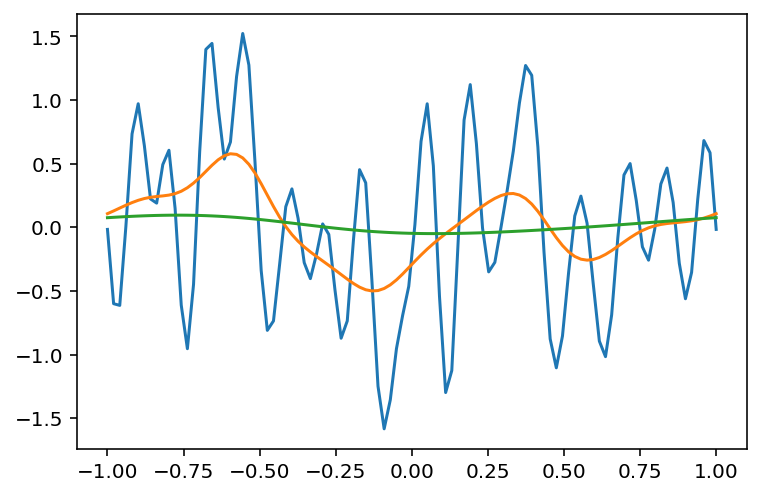

In [67]:
plt.plot(x, d_[:, 0])
plt.plot(x, d_[:, 5])
plt.plot(x, d_[:, -1])

For Fourier situation is slightly more difficult because along $t$ Chebyshev basis is used and along $x$ Fourier basis is used.

In [76]:
path = "Burgers_low_F.npz"
data = jnp.load(path)

In [77]:
print(data["features"].shape) 
print(data["targets"].shape)

(2000, 51)
(2000, 51, 100)


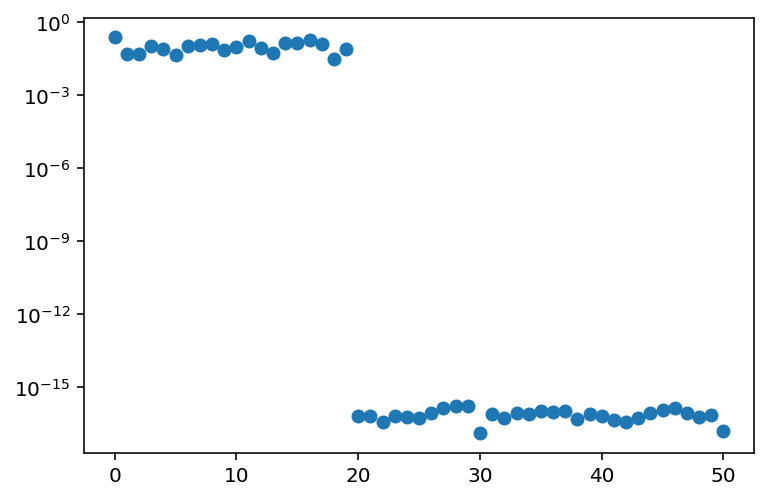

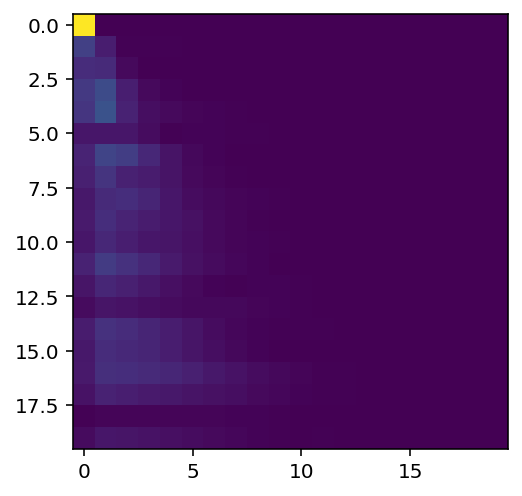

In [78]:
plt.yscale("log")
plt.plot(abs(data["features"][3]), "o");
plt.figure()
plt.imshow(abs(data["targets"][3][:20, :20]));

Reinterpolation is slightly more involving.

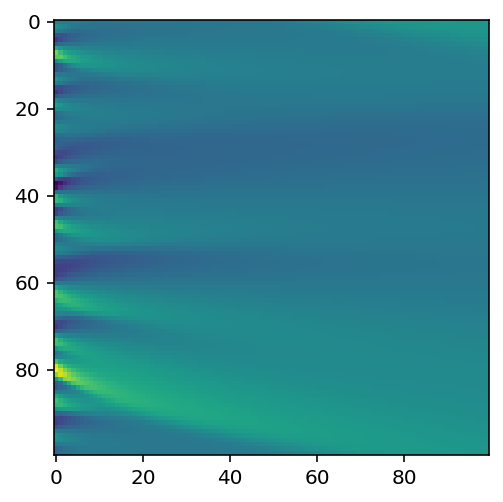

In [79]:
x = jnp.linspace(-1, 1, 100)
W = utils.get_interpolation_matrix(x, 100)

d_ = utils.mixed_coefficients_to_values(data["targets"][0, :, :].reshape((51, 100, 1)), 100).reshape((100, 100))

d_ = (d_ @ W.T) / (jnp.ones_like(d_) @ W.T)

plt.figure()
plt.imshow(d_);